In [3]:
#Este ejemplo va referido al precio de las casas buscando en el algoritmo lineal le mejor optimización
#Se realizan las importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Cargando los dataset
train=pd.read_csv('sample_data/train.csv')
test=pd.read_csv('sample_data/test.csv')
train.head(5)#mostramos los encabezados

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.columns#Vista de las columnas

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


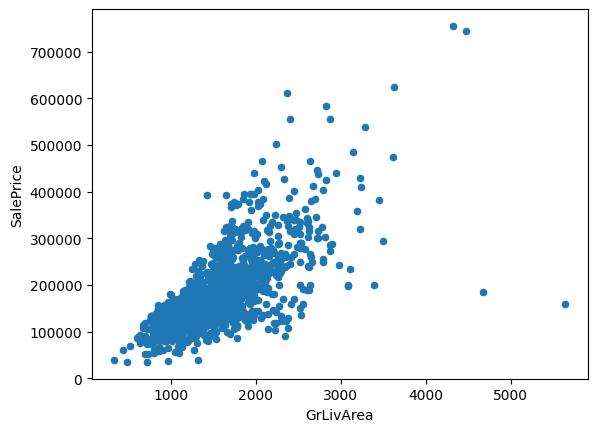

In [8]:
#tomaremos por entrada a GrLivArea y SalePrice como resultado
train.plot.scatter(x='GrLivArea',y='SalePrice')
plt.show()

In [9]:
#vemos tendencia creciente, pondremos una recta
w=125
b=0

In [10]:
#puntos de la recta
x=np.linspace(0,train['GrLivArea'].max(),100)
y=w*x+b

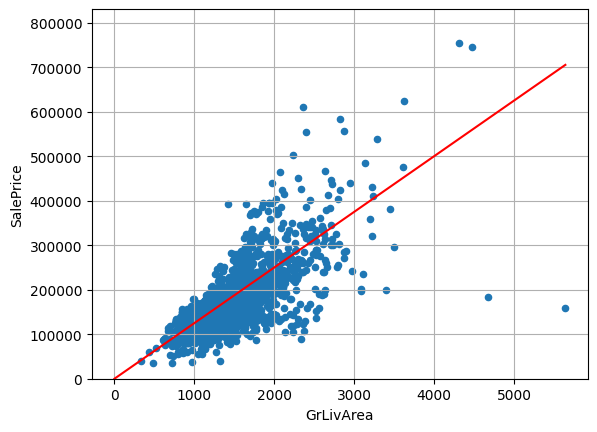

In [11]:
#graficando la recta
train.plot.scatter(x='GrLivArea',y='SalePrice')#grafica de puntos
plt.plot(x,y,'-r')#recta color rojo
plt.ylim(0,train['SalePrice'].max()*1.1)
plt.grid()
plt.show()

In [12]:
#caluclo de las predicciones
train['pred']=train['GrLivArea']*w+b

In [13]:

train['diff']=train['pred']-train['SalePrice']
train['cuad']=train['diff']**2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [14]:
#calculando error cuadratico medio
train['cuad'].mean()

3300407822.406164

In [15]:
#grid de la función de error
w=np.linspace(50,200,50)
grid_error=pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [18]:
#función de error cuadratico medio
def sum_error(w, train):
  b=0
  train['pred']=train['GrLivArea']*w+b
  train['diff']=train['pred']-train['SalePrice']
  train['cuad']=train['diff']**2
  return(train['cuad'].mean())

In [19]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()

,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


In [ ]:
#el menor era 118

<Axes: xlabel='w'>

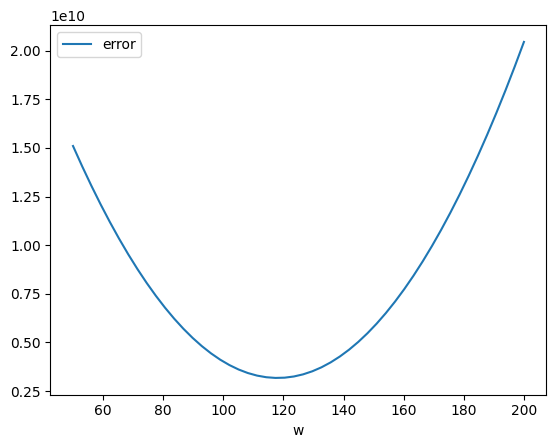

In [20]:
grid_error.plot(x='w',y='error')

In [23]:
#Ahora veremos con la implementación de las librerias implementada en sklearn

In [22]:
#buscando valores optimos
from sklearn.linear_model import LinearRegression

In [24]:
#Definiendo las entradas y salidas
x=np.array(train['GrLivArea']).reshape((-1,1))
y=np.array(train['SalePrice'])

In [25]:
#se crea el modelo
model=LinearRegression(fit_intercept=False)
model.fit(x,y)

LinearRegression(fit_intercept=False)

In [26]:
#se imprimen los parámetros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [118.06909986]
